Exploratory data analysis по датасету [Data Science London](https://www.kaggle.com/competitions/data-science-london-scikit-learn) с kaggle.

# Загрузка, первичный осмотр данных на пропуски

In [1]:
%%capture
%pip install opendatasets
%pip install -U scikit-learn
%pip install seaborn

In [2]:
import pandas as pd
import numpy as np
import opendatasets as od
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [3]:
dataset_link = "https://www.kaggle.com/competitions/data-science-london-scikit-learn"

od.download(dataset_link)
X, y = pd.read_csv("./data-science-london-scikit-learn/train.csv", header=None), pd.read_csv("./data-science-london-scikit-learn/trainLabels.csv", header=None)

Skipping, found downloaded files in "./data-science-london-scikit-learn" (use force=True to force download)


In [4]:
X.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
607,0.158192,0.919010,0.194450,-1.111271,14.593580,0.025803,0.593168,1.082880,1.137166,0.626944,...,-0.310644,-0.412744,-4.837684,2.015380,-0.533041,0.131701,-4.811711,-0.234398,-1.532204,-3.879218
425,-0.795766,-0.873803,0.377742,-2.158491,-5.000694,-1.012300,2.723356,2.268621,-2.049572,-0.953821,...,1.871079,-0.245060,4.277001,-0.454907,-2.326461,0.167746,0.982115,0.015811,0.583302,2.466811
974,-0.313161,0.716479,0.393468,1.425882,1.258684,-0.079025,3.009806,1.871930,0.319325,-0.081149,...,0.208367,0.706736,-7.484936,2.682485,1.850091,1.346623,6.209831,-0.490664,-1.360159,0.325624
633,0.612747,0.059808,-1.943451,0.398578,1.646110,-1.012934,0.119550,0.663880,0.341484,-0.440266,...,0.136549,-0.106139,0.855317,1.545862,0.415340,-0.206945,-0.764798,-1.759532,-1.416815,1.989228
784,-0.243123,0.061776,0.333428,1.594595,-1.013987,0.469379,-0.311931,0.297847,0.230526,0.326247,...,-1.566619,0.288345,3.397224,1.272994,0.795649,0.726775,-0.997249,-0.812769,-0.514349,-1.561660


In [5]:
y.sample(5)

,0
949,1
585,0
695,1
555,1
294,0


In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1000 non-null   float64
 1   1       1000 non-null   float64
 2   2       1000 non-null   float64
 3   3       1000 non-null   float64
 4   4       1000 non-null   float64
 5   5       1000 non-null   float64
 6   6       1000 non-null   float64
 7   7       1000 non-null   float64
 8   8       1000 non-null   float64
 9   9       1000 non-null   float64
 10  10      1000 non-null   float64
 11  11      1000 non-null   float64
 12  12      1000 non-null   float64
 13  13      1000 non-null   float64
 14  14      1000 non-null   float64
 15  15      1000 non-null   float64
 16  16      1000 non-null   float64
 17  17      1000 non-null   float64
 18  18      1000 non-null   float64
 19  19      1000 non-null   float64
 20  20      1000 non-null   float64
 21  21      1000 non-null   float64
 22  2

Датасет без пропусков. Все данные синтетические, нет смысла в них. Посмотрим на распределения, выбросы и будем тестировать алгоритмы

# Визуализация, выбросы

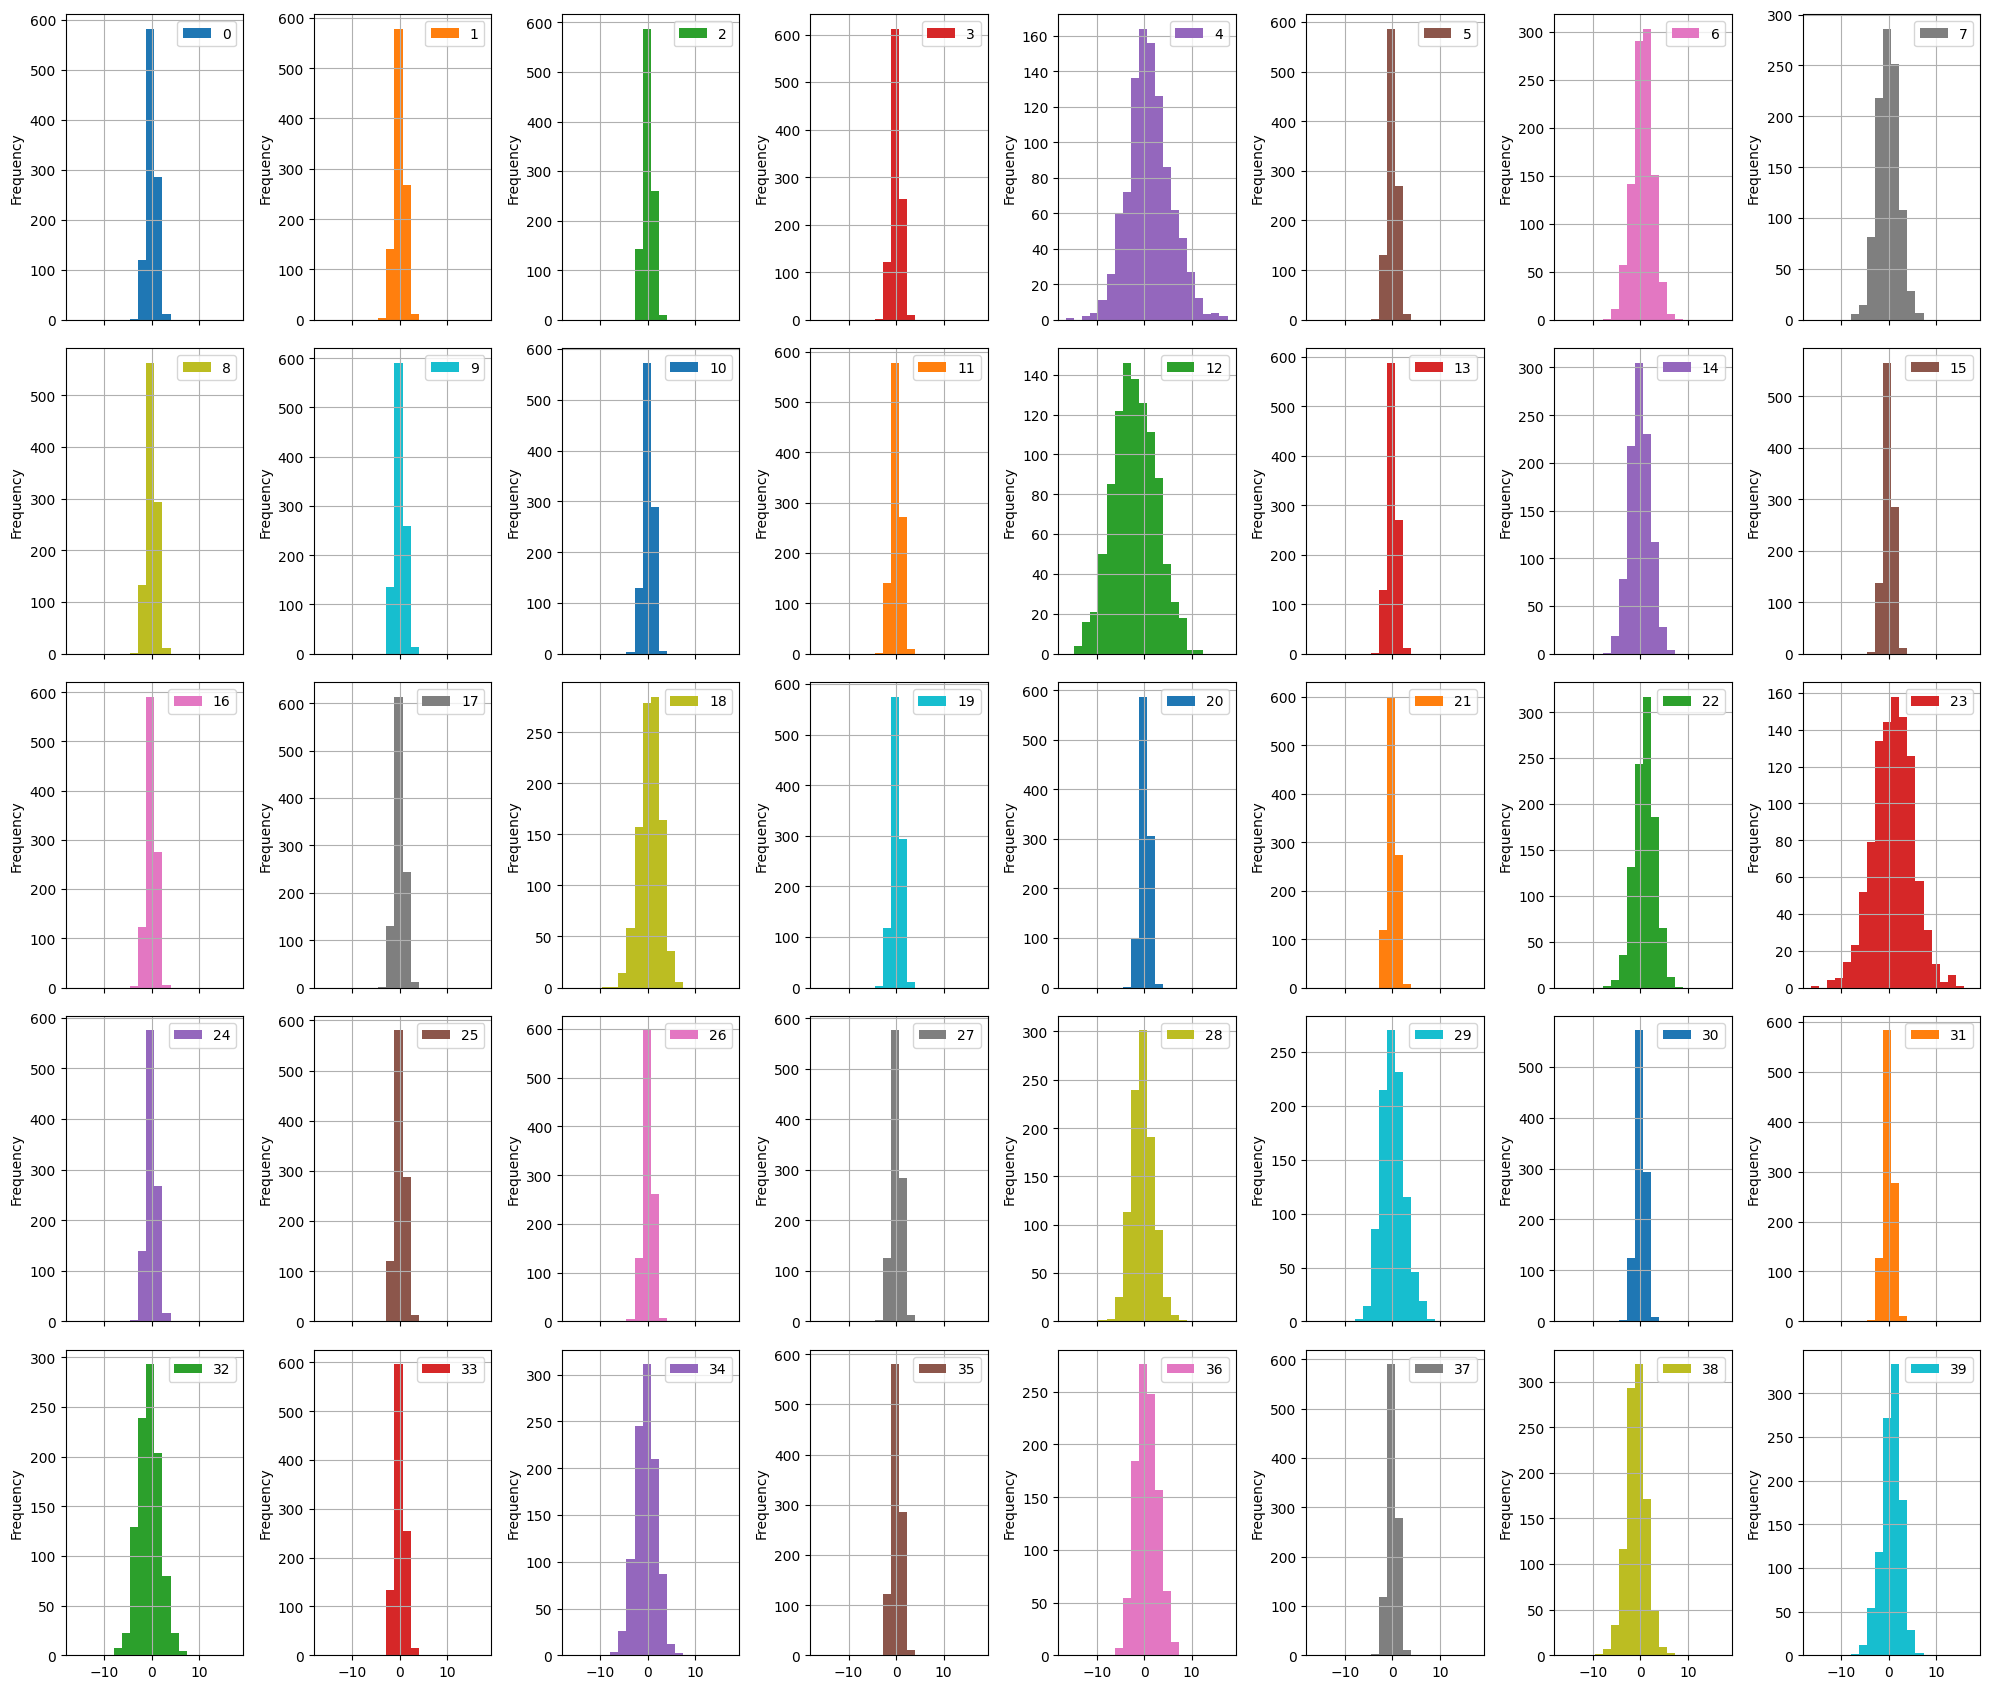

In [7]:
_ = X.plot.hist(subplots=True,
                      grid=True,
                      layout=(5, 8),
                      figsize=(20, 17),
                      bins=20)
plt.tight_layout()

У многих категорий много выбросов, наверняка quantile скейлер будет лучше работать.

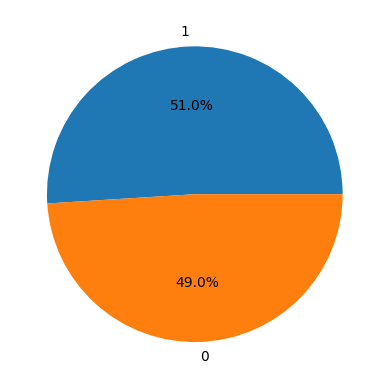

In [8]:
_ = plt.pie(x=y.value_counts(), autopct='%1.1f%%', labels=["1", "0"])

Посмотрим еще интереса ради на boxplot'ы

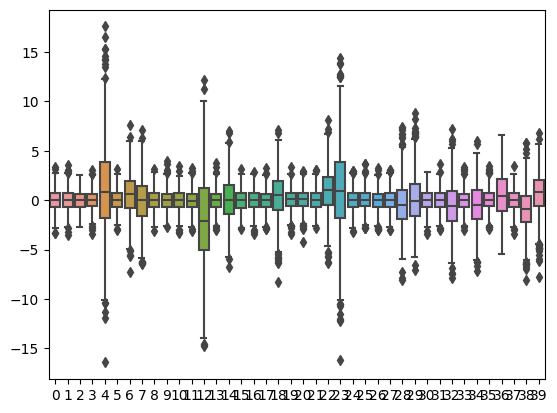

In [9]:
_ = sns.boxplot(X)

Как и думал. Выбросы есть, нормализовать придется. quantile transformer кажется будет сильно лучше работать. Посмотрим корелляцию с label итоговым и пойдем к моделям

<Axes: >

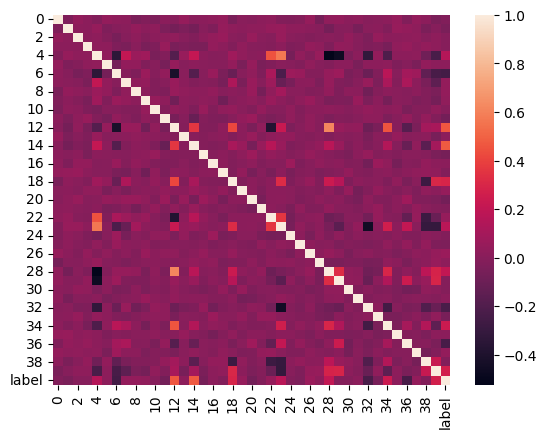

In [10]:
sns.heatmap(
    pd.concat(
    [X, y.rename(columns={0: "label"})],
    axis=1
    ).corr()
    )

In [11]:
pd.concat(
    [X, y.rename(columns={0: "label"})],
    axis=1
    ).corr()["label"]

0       -0.028058
1       -0.052153
2       -0.005618
3       -0.007439
4        0.150652
5        0.015151
6       -0.252976
7        0.040523
8        0.037534
9        0.026841
10      -0.010233
11      -0.075276
12       0.460738
13       0.018214
14       0.476171
15      -0.060556
16       0.012234
17      -0.018021
18       0.289508
19       0.046036
20      -0.075135
21      -0.018645
22       0.046953
23       0.172938
24      -0.017121
25      -0.036663
26       0.064633
27       0.019778
28       0.207949
29      -0.012022
30      -0.015797
31       0.012458
32      -0.227027
33      -0.053928
34       0.236116
35       0.012533
36      -0.231733
37       0.039376
38      -0.019690
39       0.264656
label    1.000000
Name: label, dtype: float64

Как видно, сильных связей так легко не видно. Ну значит машинное обучение

# Подбор алгоритмов и параметров

In [12]:
from sklearn.preprocessing import StandardScaler, QuantileTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.metrics import f1_score

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
models = [
    SVC,
    LinearSVC,
    KNeighborsClassifier,
    GradientBoostingClassifier,
    HistGradientBoostingClassifier
]

# stock performance
stock_f1_score = {}

for model in models:
    stock_f1_score[model.__name__] = f1_score(
        y_true=y_test,
        y_pred=model().fit(X_train, y_train.values.ravel()).predict(X_test)
        )

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [15]:
{k: v for k, v in sorted(stock_f1_score.items(), key=lambda item: item[1], reverse=True)}

{'SVC': 0.8900523560209425,
 'HistGradientBoostingClassifier': 0.8865979381443299,
 'KNeighborsClassifier': 0.8787878787878788,
 'GradientBoostingClassifier': 0.875,
 'LinearSVC': 0.8229166666666666}

Возьмем топ 3, попробуем из с quantile и standart scaler в простом пайплайне

In [16]:
from itertools import product
from collections import defaultdict

models = [
    SVC,
    HistGradientBoostingClassifier,
    KNeighborsClassifier
]

scalers = [
    QuantileTransformer,
    StandardScaler
]

scaled_f1_score = defaultdict(dict)

for _model, _scaler in product(models, scalers):
    pipe = Pipeline([
        ("scaler", _scaler()),
        ("model", _model())
    ])

    pipe.fit(X_train, y_train.values.ravel())

    scaled_f1_score[_scaler.__name__][_model.__name__] = f1_score(
        y_true=y_test,
        y_pred=pipe.predict(X_test)
        )

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (800). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (800). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (800). n_quantiles is set to n_samples.
  warnings.warn(


In [17]:
pd.DataFrame(scaled_f1_score)

,QuantileTransformer,StandardScaler
SVC,0.860104,0.864583
HistGradientBoostingClassifier,0.886598,0.886598
KNeighborsClassifier,0.829268,0.807512


In [18]:
pd.DataFrame(stock_f1_score, index=[0])

,SVC,LinearSVC,KNeighborsClassifier,GradientBoostingClassifier,HistGradientBoostingClassifier
0,0.890052,0.822917,0.878788,0.875,0.886598


Скалирование сделало результаты хуже, странно. Попробуем просто настройку гиперпараметров через gridsearch, без скейлинга

In [19]:
models = [
    SVC,
    HistGradientBoostingClassifier,
    KNeighborsClassifier
]

param_grids = {
    SVC: {
        "C": [0.1, 0.5, 1, 2, 5, 10, 20, 50, 100],
        'gamma':[1,0.1,0.001,0.0001],
        'kernel':['linear','rbf']},
    KNeighborsClassifier: {
        "n_neighbors": [3, 4, 5, 6, 7, 10],
        "algorithm": ['ball_tree', 'kd_tree', 'auto'],
        "leaf_size": [20, 30, 50]
    },
    HistGradientBoostingClassifier: {
        "learning_rate": [0.06, 0.1, 0.15, 0.2],
        "max_iter": [60, 100, 150, 300, 500],
        "max_leaf_nodes": [20, 31, 50, None],
    }
}

trained_grids, grid_scores = {}, {}

for _model in models:
    grid = GridSearchCV(
        estimator=_model(),
        param_grid=param_grids[_model],
        cv=3,
        refit=True,
        scoring="f1",
        n_jobs=-1
    )
    grid.fit(X_train, y_train)
    print(f"{_model.__name__} fitted")
    trained_grids[_model.__name__], grid_scores[_model.__name__] = grid, grid.score(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC fitted


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


HistGradientBoostingClassifier fitted
KNeighborsClassifier fitted


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [20]:
grid_scores

{'SVC': 0.8958333333333333,
 'HistGradientBoostingClassifier': 0.8787878787878788,
 'KNeighborsClassifier': 0.9025641025641027}

In [21]:
svc_params = trained_grids["SVC"].best_params_

Попробуем еще раз применить скейлеры к классификаторам с подобными параметрами, откинем HistGradientBoostingClassifier

In [22]:
from sklearn.base import TransformerMixin


class DummyScaler(TransformerMixin):
    def __init__(self, **kwargs):
        self.params = kwargs
        pass

    def fit(self, X, *args):
        return self

    def transform(self, X, *args):
        return X

    def fit_transform(self, X, *args):
        return X

    def get_params(self):
        return self.params


In [23]:
svc_params = trained_grids["SVC"].best_params_
KN_params = trained_grids["KNeighborsClassifier"].best_params_

models = [
    SVC().set_params(**svc_params),
    KNeighborsClassifier().set_params(**KN_params)
]

scalers = [
    QuantileTransformer,
    StandardScaler,
    DummyScaler
]

models_with_scalers = defaultdict(dict)
pipe_f1_scores = defaultdict(dict)

for _model, _scaler in product(models, scalers):
    pipe = Pipeline([
        ("scaler", _scaler()),
        ("model", _model)
    ])

    pipe.fit(X_train, y_train.values.ravel())

    models_with_scalers[_scaler.__name__][type(_model).__name__] = pipe

    pipe_f1_scores[_scaler.__name__][type(_model).__name__] = f1_score(
        y_true=y_test,
        y_pred=pipe.predict(X_test)
        )

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (800). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (800). n_quantiles is set to n_samples.
  warnings.warn(


In [24]:
pd.DataFrame(pipe_f1_scores)

,QuantileTransformer,StandardScaler,DummyScaler
SVC,0.818653,0.848168,0.895833
KNeighborsClassifier,0.844221,0.848485,0.902564


Пока что у меня получается только 0.9 f1 при помощи тюненого KNeighborsClassifier без скейлера. прогоним через него тест данные и загрузим их на kaggle

# Финальная модель

In [25]:
final_estimator = KNeighborsClassifier().set_params(**KN_params)

X, y = pd.read_csv("./data-science-london-scikit-learn/train.csv", header=None), pd.read_csv("./data-science-london-scikit-learn/trainLabels.csv", header=None)
Test_X = pd.read_csv("./data-science-london-scikit-learn/test.csv", header=None)

final_estimator.fit(X, y.values.ravel())

ninekindex = pd.Series(range(1, 9001))

predictions = pd.DataFrame(final_estimator.predict(Test_X).T)
predictions = pd.concat([ninekindex, predictions], axis=1)

predictions.to_csv('submission.csv', sep = ',', header=["Id", "Solution"], index=False)

Отправив этот файл на оценку я получил данные результаты:

Score: 0.88822  
Private score: 0.89645

Некоторые участники могли добиться результатов в 0.99+
Мой результат находится на уровне ~150 места